In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dfs = {
    'Baseline': pd.read_csv('results/Baseline_12-32-27_01-16-2023.csv'), 
    'Shamir sharing': pd.read_csv('results/Shamir_01-34-08_01-16-2023.csv'),
    'Bonawitz': pd.read_csv('results/Bonawitz_05-25-36_01-14-2023.csv'),
    'Bell': pd.read_csv('results/Bell_20-23-33_01-14-2023.csv'),   #(k=50)
    'Masking': pd.read_csv('results/Masking_12-51-26_01-16-2023.csv'),
}

### 1. Set dimensions constant, vary #clients


In [12]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
dim = 100
df_c = {k: df[df['clients'] != 512] for k, df in dfs.items()}
df_dim = {k: df[df['dimension'] == dim] for k, df in df_c.items()}
df_g = {k: df.groupby(['clients']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

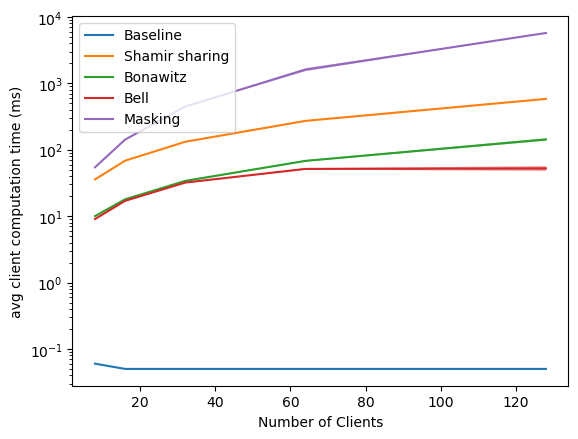

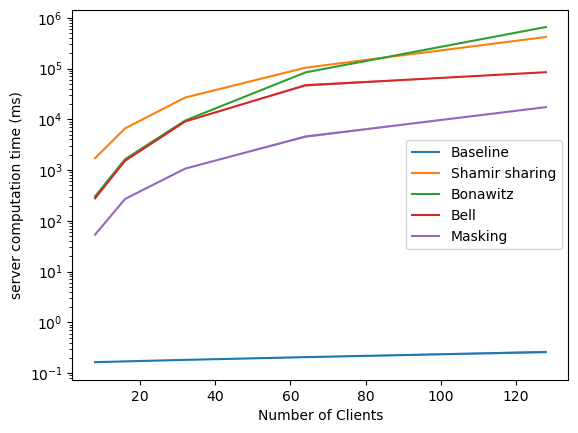

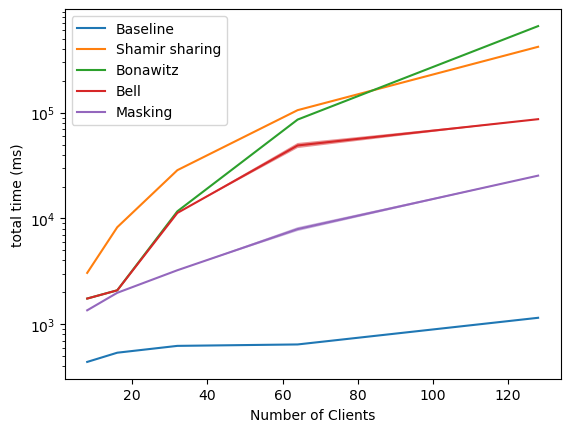

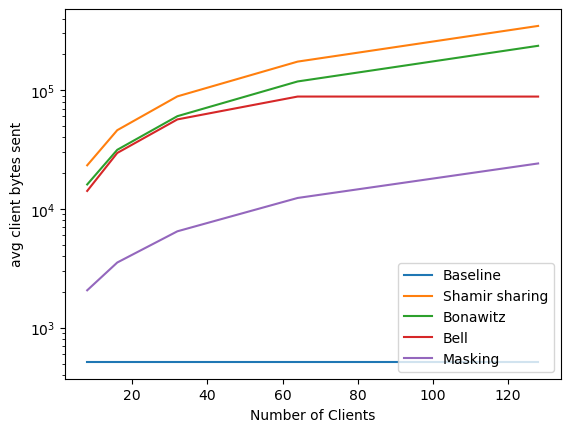

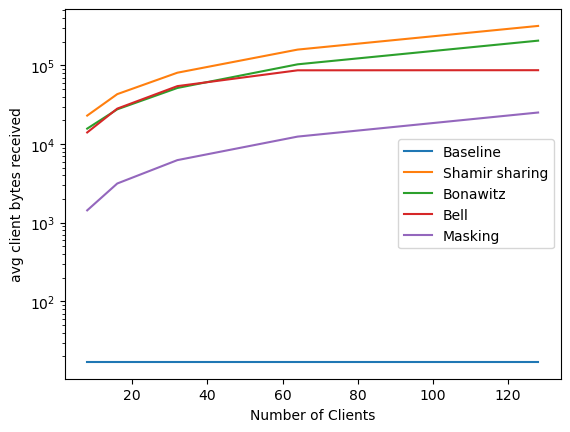

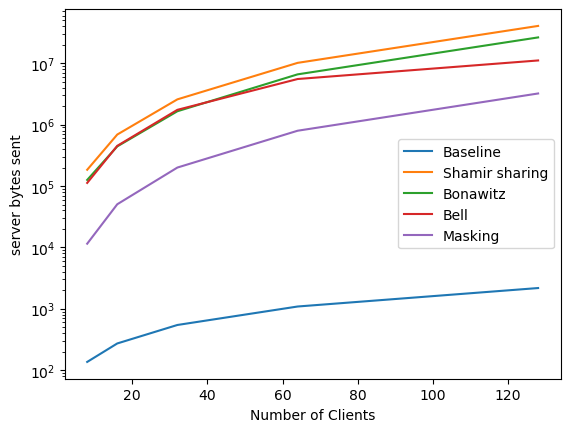

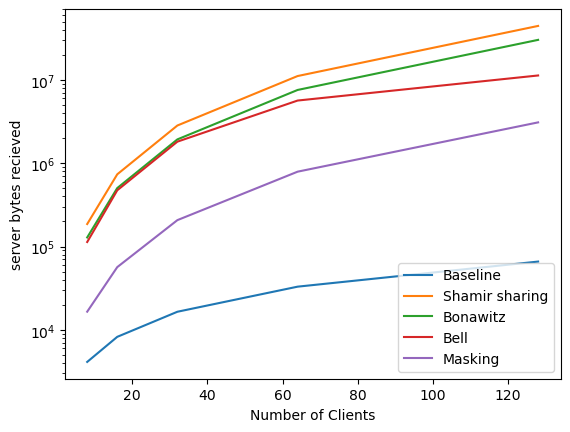

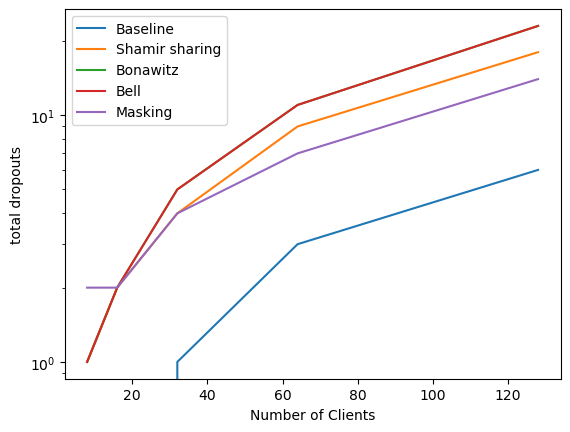

In [14]:
#plt.plot(means.index, means[' total time'], error=stds[' total time'])
for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000

        plt.plot(x, y, label=k)
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Clients')
    plt.ylabel(c)
    plt.legend()
    plt.yscale('log')
    plt.savefig(f"results/plots/client_{c}_results.pdf", dpi=400)
    plt.show()

## 2. Set clients constant, vary dimensions

In [5]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
clients = 64
df_c = {k: df[df['dimension'] != 10000000] for k, df in dfs.items()}
df_c = {k: df[df['dimension'] != 1000000] for k, df in df_c.items()}
df_dim = {k: df[df['clients'] == clients] for k, df in df_c.items()}
df_g = {k: df.groupby(['dimension']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

# means['Bonawitz'] #[[means['Bonawitz'] < 100]]
# means['Masking'] #[[means['Bonawitz'] < 100]]

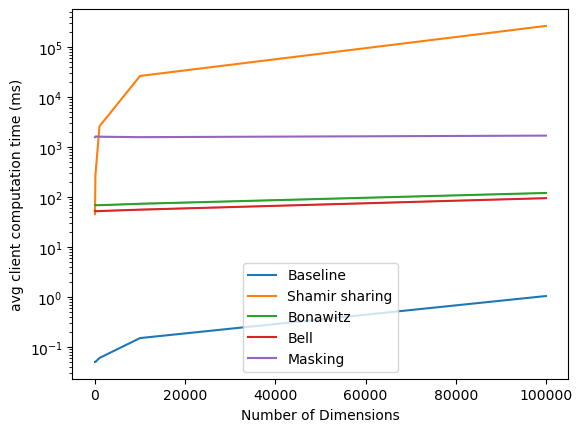

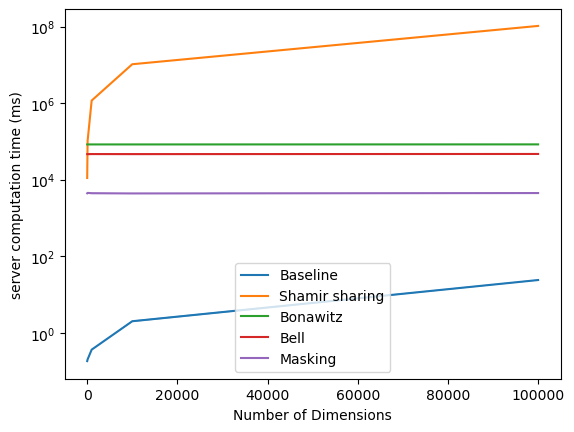

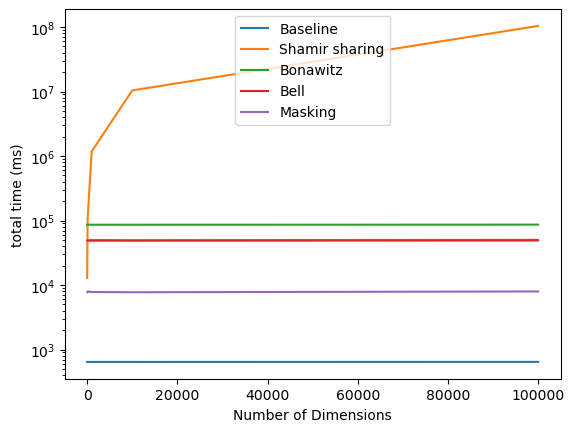

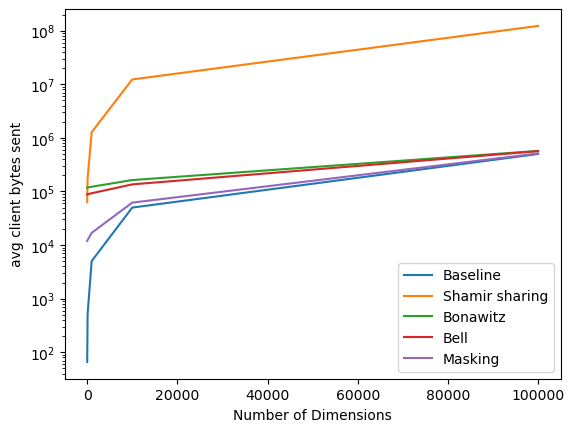

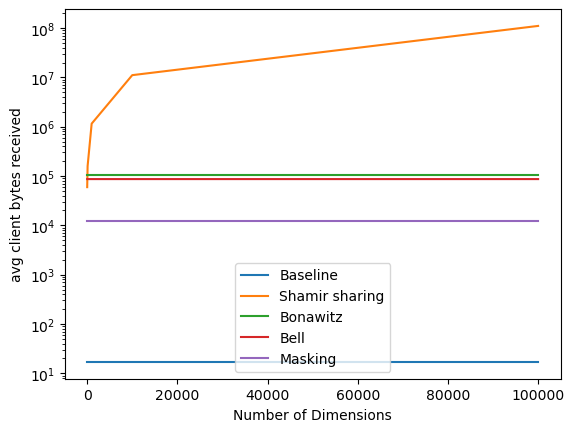

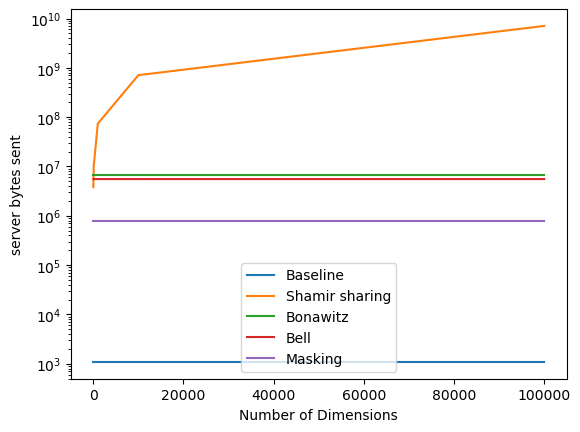

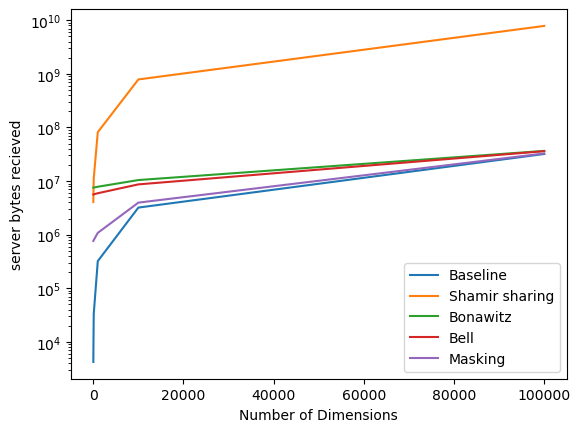

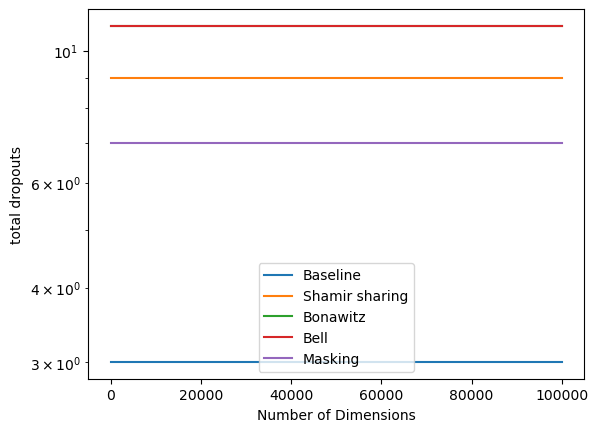

In [6]:

#plt.plot(means.index, means[' total time'], error=stds[' total time'])
for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000

        plt.plot(x, y, label=k)
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Dimensions')
    plt.ylabel(c)
    plt.yscale('log')
    plt.legend()
    plt.savefig(f"results/plots/dim_{c}_results.pdf", dpi=400)
    plt.show()

### Large Values

In [7]:
dfs = {
    'Baseline': pd.read_csv('results/Baseline_Large_16-43-41_01-22-2023.csv'), 
    # 'Shamir sharing': pd.read_csv('final_results/shamir_00_27_33_10-11-2022.csv'),
    # 'Bonawitz': pd.read_csv('final_results/bonawitz_05_31_58_10-10-2022.csv'),
    'Bell(k=50)': pd.read_csv('results/Bell_Large_04-30-26_01-22-2023.csv'), 
}

### 1. Set dimensions constant, vary #clients

In [8]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
dim = 100
df_c = {k: df[df['clients'] != 100] for k, df in dfs.items()}
df_dim = {k: df[df['dimension'] == dim] for k, df in df_c.items()}
df_g = {k: df.groupby(['clients']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

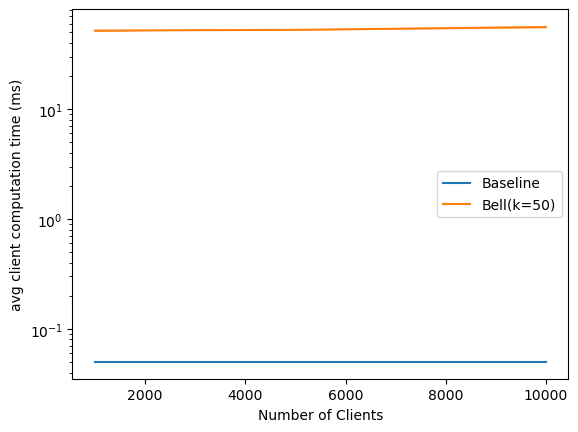

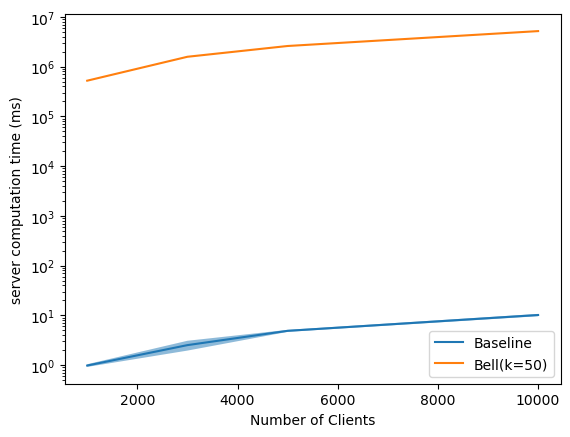

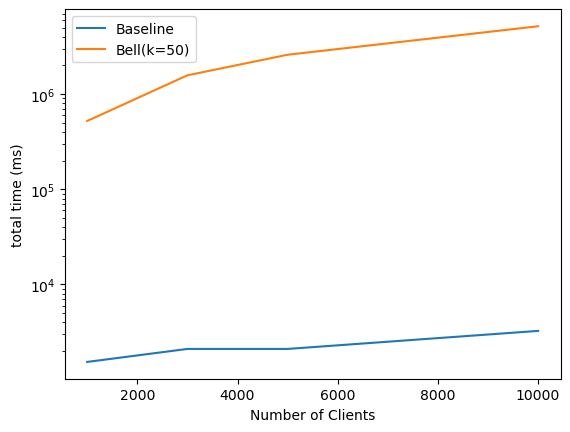

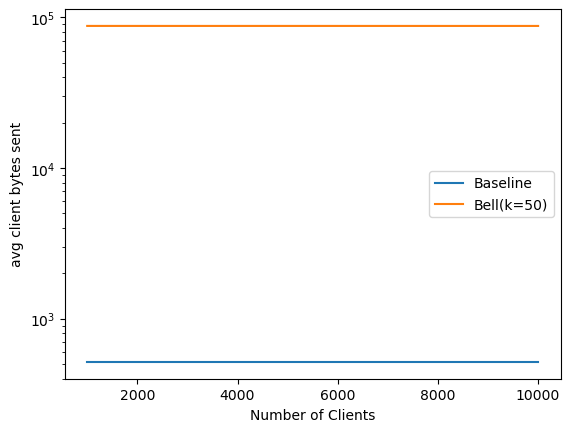

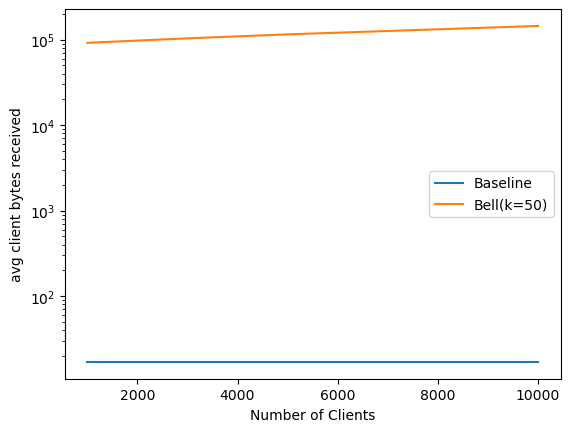

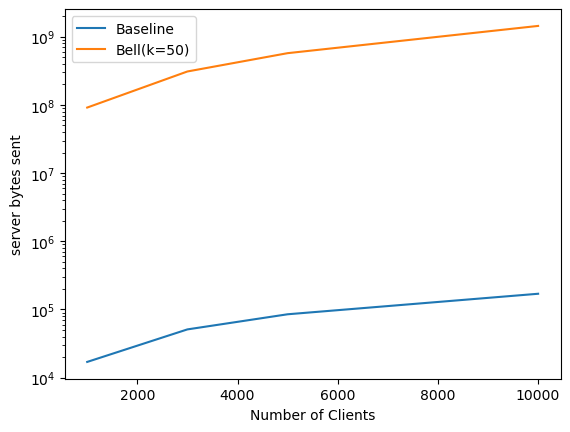

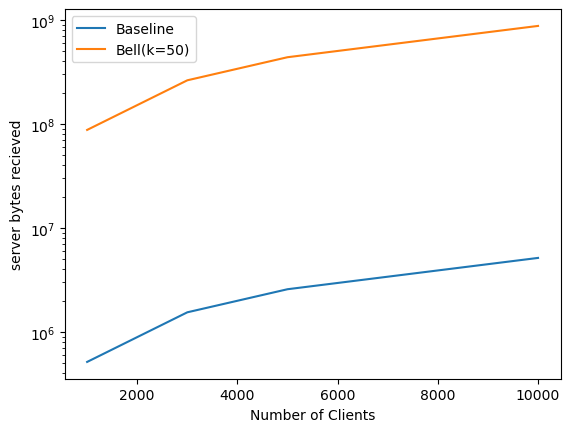

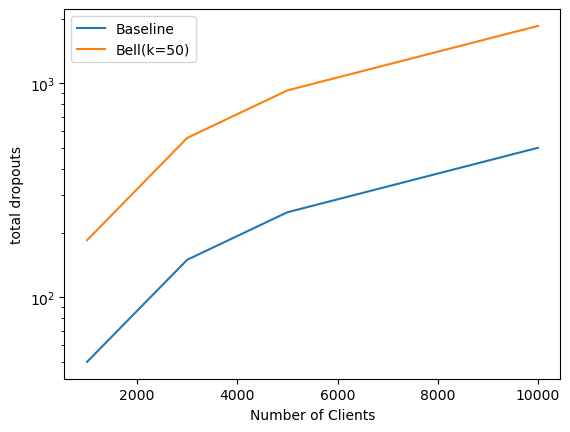

In [9]:
#plt.plot(means.index, means[' total time'], error=stds[' total time'])
for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000

        plt.plot(x, y, label=k)
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Clients')
    plt.ylabel(c)
    plt.yscale('log')
    plt.legend()
    plt.savefig(f"results/plots/large_client_{c}_results.pdf", dpi=400)
    plt.show()